In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import cv2


In [4]:
import math

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from keras.preprocessing import image

Using TensorFlow backend.


In [7]:
from keras.utils import np_utils

In [8]:
from skimage.transform import resize


In [20]:
count = 0
videofile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videofile)# capturing the video from the given path
framerate = cap.get(5)#frame rate
x=1


In [21]:
while(cap.isOpened()):
    frameId = cap.get(1)#current frame number
    ret, frame = cap.read()
    if(ret != True):
        break
    if (frameId % math.floor(framerate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


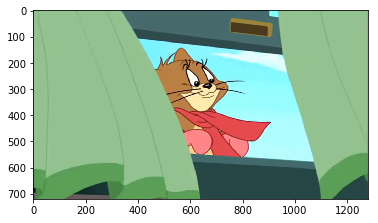

In [22]:
img = plt.imread('frame0.jpg')
plt.imshow(img)

In [13]:
data = pd.read_csv("mapping/mapping.csv")

In [14]:
data.head()



,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [15]:
plttest = plt.imread('frame1.jpg')

In [16]:
plttest

array([[[  4,  21,  13],
        [124, 144, 135],
        [145, 166, 157],
        ...,
        [200, 222, 219],
        [167, 189, 186],
        [ 14,  36,  33]],

       [[  5,  22,  12],
        [124, 144, 133],
        [145, 167, 155],
        ...,
        [200, 222, 219],
        [167, 189, 186],
        [ 14,  36,  33]],

       [[  5,  22,  12],
        [124, 144, 133],
        [144, 166, 154],
        ...,
        [200, 222, 219],
        [167, 189, 186],
        [ 14,  36,  33]],

       ...,

       [[ 21,  22,  16],
        [177, 178, 172],
        [208, 209, 203],
        ...,
        [197, 196, 192],
        [171, 170, 166],
        [ 25,  24,  20]],

       [[ 21,  22,  16],
        [177, 178, 172],
        [208, 209, 203],
        ...,
        [197, 196, 192],
        [171, 170, 166],
        [ 25,  24,  20]],

       [[ 21,  22,  16],
        [177, 178, 172],
        [208, 209, 203],
        ...,
        [197, 196, 192],
        [171, 170, 166],
        [ 25,  24,  20]]

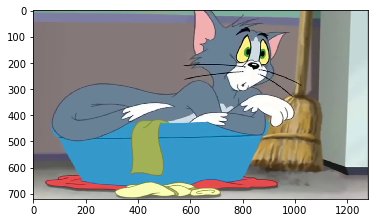

In [17]:
plt.imshow(plttest)

In [25]:
X = []
for img_data in data[:41].Image_ID:
    img = plt.imread('' + img_data)
    X.append(img)
X = np.array(X)

In [26]:
X

array([[[[  0,  43,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [170, 203, 160],
         [144, 177, 134],
         [  6,  39,   0]],

        [[  0,  43,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [170, 203, 160],
         [144, 177, 134],
         [  6,  39,   0]],

        [[  0,  43,   0],
         [134, 178, 129],
         [161, 205, 156],
         ...,
         [170, 203, 160],
         [144, 177, 134],
         [  6,  39,   0]],

        ...,

        [[  6,   6,  16],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 46,  71,  68],
         [ 47,  67,  66],
         [  0,  13,  13]],

        [[  6,   6,  16],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 46,  71,  68],
         [ 47,  67,  66],
         [  0,  13,  13]],

        [[  6,   6,  16],
         [ 79,  79,  87],
         [103, 104, 108],
         ...,
         [ 46,  71,  68],
        

In [27]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [28]:
dummy_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [29]:
#We will be using a VGG16 pretrained model which takes an input image of shape (224 X 224 X 3). Since our images are in a different size, we need to reshape all of them. We will use the resize() function of skimage.transform to do this.

In [30]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [31]:
X

array([[[[156, 200, 151],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [147, 193, 144],
         [150, 192, 144],
         [166, 200, 156]],

        [[156, 200, 151],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [146, 193, 144],
         [149, 192, 144],
         [164, 200, 156]],

        [[156, 200, 151],
         [146, 190, 139],
         [146, 190, 139],
         ...,
         [146, 194, 144],
         [149, 192, 144],
         [163, 200, 156]],

        ...,

        [[101, 102, 104],
         [ 95, 104,  85],
         [ 77, 131,  77],
         ...,
         [ 36,  70,  67],
         [ 36,  70,  67],
         [ 42,  67,  65]],

        [[101, 102, 104],
         [ 95, 104,  85],
         [ 77, 131,  77],
         ...,
         [ 37,  70,  67],
         [ 36,  70,  67],
         [ 41,  68,  65]],

        [[101, 102, 104],
         [ 95, 104,  85],
         [ 78, 132,  78],
         ...,
         [ 38,  70,  67],
        

In [32]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data

In [33]:
dummy_y


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [34]:
X

array([[[[ 0.22352946,  0.5686275 ,  0.18431377],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         ...,
         [ 0.15294123,  0.5137255 ,  0.12941182],
         [ 0.17647064,  0.5058824 ,  0.12941182],
         [ 0.30196083,  0.5686275 ,  0.22352946]],

        [[ 0.22352946,  0.5686275 ,  0.18431377],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         ...,
         [ 0.14509809,  0.5137255 ,  0.12941182],
         [ 0.1686275 ,  0.5058824 ,  0.12941182],
         [ 0.28627455,  0.5686275 ,  0.22352946]],

        [[ 0.22352946,  0.5686275 ,  0.18431377],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         [ 0.14509809,  0.4901961 ,  0.09019613],
         ...,
         [ 0.14509809,  0.52156866,  0.12941182],
         [ 0.1686275 ,  0.5058824 ,  0.12941182],
         [ 0.27843142,  0.5686275 ,  0.22352946]],

        ...,

        [[-0.20784312, -0.19999999, -0

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y[:41], test_size=0.3, random_state=42)    # preparing the validation set

In [37]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,InputLayer,Dropout


In [38]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(224,224,3))# include_top=False to remove the top layer

58892288/58889256 [==============================] - 59s 1us/step

In [39]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((28, 7, 7, 512), (13, 7, 7, 512))

In [40]:
#The shape of X_train and X_valid is (28, 7, 7, 512), (13, 7, 7, 512) respectively. In order to pass it to our neural network, we have to reshape it to 1-D.

In [41]:
X_train = X_train.reshape(28,7*7*512) #converting to 1D
X_valid = X_valid.reshape(13,7*7*512)

In [43]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [44]:
model = Sequential()
model.add(InputLayer((7*7*512,)))#input layer
model.add(Dense(units=1024, activation='sigmoid'))#hidden layer
model.add(Dense(3, activation = 'softmax')) #output layer


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(train,y_train, epochs=100, validation_data=(X_valid, y_valid))

Train on 28 samples, validate on 13 samples
Epoch 1/100
28/28 [==============================] - 2s 76ms/step - loss: 1.2137 - acc: 0.1429 - val_loss: 0.7740 - val_acc: 0.7692
Epoch 2/100
28/28 [==============================] - 1s 27ms/step - loss: 1.2070 - acc: 0.6429 - val_loss: 0.7410 - val_acc: 0.7692
Epoch 3/100
28/28 [==============================] - 1s 28ms/step - loss: 0.7948 - acc: 0.6429 - val_loss: 0.8242 - val_acc: 0.7692
Epoch 4/100
28/28 [==============================] - 1s 27ms/step - loss: 0.4793 - acc: 0.8571 - val_loss: 0.9065 - val_acc: 0.7692
Epoch 5/100
28/28 [==============================] - 1s 27ms/step - loss: 0.3521 - acc: 0.8214 - val_loss: 0.9177 - val_acc: 0.7692
Epoch 6/100
28/28 [==============================] - 1s 29ms/step - loss: 0.1715 - acc: 0.9286 - val_loss: 0.9084 - val_acc: 0.7692
Epoch 7/100
28/28 [==============================] - 1s 26ms/step - loss: 0.0896 - acc: 1.0000 - val_loss: 0.9084 - val_acc: 0.7692
Epoch 8/100
28/28 [=============